# Investigation of the applicability of DBSCAN algorithm to the MNIST dataset
### Ms in Data Science
### Federico Matteo
### February 13, 2020

**Index**
1. *Introduction*
2. *Exploratory Data Analysis and Pre processing*
3. *Metrics for clustering algorithms and DBSCAN application*
4. *Comparison with other Clustering Algorithms*
5. *Conclusions*

## 1. Introduction

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training and testing in the field of machine learning. It is widely used for academic purposes and to understand limitations and pros of basic and advanced machine learning methods.

The dataset has been divided into two sets:
- a training set with 60,000 examples, 
- a test set with 10,000 examples.

We have labels for all the examples.
Each one of those consists of 28x28 pixel images of handwritten digits. Every single data point (i.e., every image) can be conveyed as 2D-array of numbers, where each number describes how dark each pixel is. In other words, a 28x28 array of numbers corresponds to a 28x28 pixel image.

It is important to notice that we can flatten each two-dimensional array into a 784 dimensional vector. Each component of the vector is a float between zero and one, representing the intensity of each pixel in the image. Zero stands for black and one stands for white. The labels are numbers between zero and nine, so that a label corresponds to the number represented into the image.


The dataset was fistly used and created by Corinna Cortes and then slighlty modified by Yunn LeCun.
It is publicly available at the following [link](http://yann.lecun.com/exdb/mnist/) and the version we will work with has been downloaded from here. 

Both authors have worked on the dataset trying to identify the best model minimizing the losses from innacuracy in classification. 
To this aim, several methods have been developed and a variaty of papers published in the literature. After years of investigations in this field, it is possible to gather the efforts from the whole machine learning community and to identify a Convolutional Neural Network as the best model, having an error rate on the test set equal to 0.17%. It is possible to use this value as banchmark for this dataset.

We would like to notice that this model is the most complex among all the ones tested, so that also using a simple algorihtm as the K-Nearest Neighbors it is possible to reach a very small test error (0.52%). Finally, a comparison of the most known approaches to this dataset is summerised in the following table.


| Type                                   | Classifier                                                                            | Distortion          | Preprocessing                       | Error rate (%) |
|----------------------------------------|---------------------------------------------------------------------------------------|---------------------|-------------------------------------|----------------|
| Linear classifier                      | Pairwise linear classifier                                                            | None                | Deskewing                           | 7.6            |
| K-Nearest Neighbors                    | K-NN with non-linear deformation (P2DHMDM)                                            | None                | Shiftable edges                     | 0.52           |
| Boosted Stumps                         | Product of stumps on Haar features                                                    | None                | Haar features                       | 0.87           |
| Non-linear classifier                  | 40 PCA + quadratic classifier                                                         | None                | None                                | 3.3            |
| Random Forest                          | Fast Unified Random Forests for Survival, Regression, and Classification (RF-SRC) | None                | Simple statistical pixel importance | 2.8            |
| Support-vector machine (SVM)           | Virtual SVM, deg-9 poly, 2-pixel jittered                                             | None                | Deskewing                           | 0.56           |
| Deep neural network (DNN)              | 2-layer 784-800-10                                                                    | None                | None                                | 1.6            |
| Deep neural network                    | 2-layer 784-800-10                                                                    | Elastic distortions | None                                | 0.7            |
| Deep neural network                    | 6-layer 784-2500-2000-1500-1000-500-10                                                | Elastic distortions | None                                | 0.35           |
| Convolutional neural network (CNN)     | 6-layer 784-40-80-500-1000-2000-10                                                    | None                | Expansion of the training data      | 0.31           |
| Convolutional neural network           | 6-layer 784-50-100-500-1000-10-10                                                     | None                | Expansion of the training data      | 0.27           |
| Convolutional neural network           | Committee of 35 CNNs, 1-20-P-40-P-150-10                                              | Elastic distortions | Width normalizations                | 0.23           |
| Convolutional neural network           | Committee of 5 CNNs, 6-layer 784-50-100-500-1000-10-10                                | None                | Expansion of the training data      | 0.21           |
| Random Multimodel Deep Learning (RMDL) | 10 NN-10 RNN - 10 CNN                                                                 | None                | None                                | 0.18           |
| Convolutional neural network           | Committee of 20 CNNS with Squeeze-and-Excitation Networks                         | None                | Data augmentation                   | 0.17           |

It easy to see that all the analysed approaches belong to the field of Supervised Learning. In this work, we will try to apply and compare methods belonging to the Unsupervised field. In particular, we will investigate the applicability of the DBSCAN algorithm and compare it with other unsupervised methods using different kind of metrics. From the first moment, it is important to say that error rates as low as the ones previously reported are unfeasible with this approach.


As a matter of fact, instead of being guided by labels, unsupervised learning works by learning the underlying structure of the data it has trained on. It does this by trying to represent the data it trains on with a set of parameters that is significantly smaller than the number of examples available in the dataset. By performing this representation learning, unsupervised learning is able to identify distinct patterns in the dataset.


In the MNIST image dataset example (this time without labels), the unsupervised learning framework may be able to identify and group images based on how similar they are to each other and how different they are from the rest. For example, all the images representing a zero will be grouped together, all the images that represent a one or a seven will be grouped together, etc.

So that for this analysis the labels will only be used to build the indices for the accuracy calculation.

## DBSCAN Algorithm

Density-based clustering locates regions of high density that are separated from one another by regions of low density and DBSCAN represents a simple and effective density-based clustering algorithm.


The center-based approach to density allows us to classify a point as being (1) in the interior of a dense region (a core point), (2) on the edge of a dense region (a border point), or (3) in a sparsely occupied region (a noise or background point). 
1. Core points: These points are in the interior of a density-based cluster. A point is a core point if the number of points within a given neighborhood around the point as determined by the distance function and a user specified distance parameter, $\varepsilon$, exceeds a certain threshold, $MinPts$, which is also a user-specified parameter.
2. Border points: A border point is not a core point, but falls within the neighborhood of a core point. A border point can fall within the neighborhoods of several core points.
3. Noise points: A noise point is any point that is neither a core point nor a border point. 

The basic time complexity of the DBSCAN algorithm is $$O(m \times \text{time to find points in the $\varepsilon$-neighborhood})$$ where $m$ is the number of points. In the worst case, this complexity is $O(m^2)$. 


**Algorithm** <br/>
1. Label all points as core, border, or noise points.<br/>
2. Eliminate noise points.<br/>
3. Put an edge between all core points that are within $\varepsilon$ of each other.<br/>
4. Make each group of connected core points into a separate cluster.<br/>
5. Assign each border point to one of the clusters of its associated core points.


Finally, we will apply DBSCAN to a dataset of 10000x748, where each row is an image and the columns are the pixels of each image. To make the algorithm working, we will try to reduce the dimensionality of the features using different techniques and to apply it to the best obtained result.

## 2. Exploratory Data Analysis and Pre processing

We have tried to use the DBSCAN algorithm directly on the MNIST dataset, but the huge scale nature of the dataset and the quadratic computational cost of the algorithm have made this impossible.
For this reason, a pre processing phase has been performed and two dimensionality reduction methods applied. In addition, since there is no learning for this approach and we only need to find the best cluster division given our data, we will consider only one dataset of the MNIST database.


First of all, we import all the required libreries as well as the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.data import loadlocal_mnist
from sklearn import metrics
from sklearn.cluster import DBSCAN
import warnings
np.random.seed(23003)
random_state = 2018
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
X_train, y_train = loadlocal_mnist(
        images_path='/Users/federicomatteo/Desktop/Machine Learning Project/train-images-idx3-ubyte', 
        labels_path='/Users/federicomatteo/Desktop/Machine Learning Project/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path='/Users/federicomatteo/Desktop/Machine Learning Project/t10k-images-idx3-ubyte', 
        labels_path='/Users/federicomatteo/Desktop/Machine Learning Project/t10k-labels-idx1-ubyte')

In [3]:
print(f'Dimensions of Training Set: {X_train.shape}')
print(f'Dimensions of Labels for the Training Set: {y_train.shape}')
print(f'Dimensions of Testing Set: {X_test.shape}')
print(f'Dimensions of Labels for the Testing Set: {y_test.shape}')

Dimensions of Training Set: (60000, 784)
Dimensions of Labels for the Training Set: (60000,)
Dimensions of Testing Set: (10000, 784)
Dimensions of Labels for the Testing Set: (10000,)


Due to the huge scale framework, we reduce the number of examples in the training set from 60000 to 10000 by randomly select them, leadining to a fast convergence of the tested algorithm and of the whole procedure in general (also considering that each cell of the notebook must be run in live).

In [4]:
IndexSet = np.random.randint(low = 0, high = 60000, size = 10000)
X = X_train[IndexSet,:]; print(f'Dimensions of Training Set: {X.shape}')
y = y_train[IndexSet]; print(f'Dimensions of Labels for the Training Set: {y.shape}')

Dimensions of Training Set: (10000, 784)
Dimensions of Labels for the Training Set: (10000,)


Let's move to pandas


In [5]:
X = pd.DataFrame(data=X)
y = pd.Series(data=y)
#X.describe()

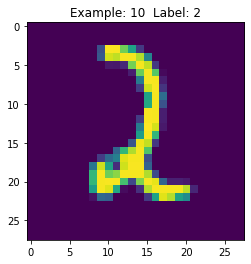

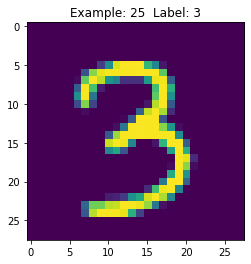

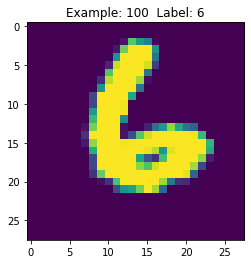

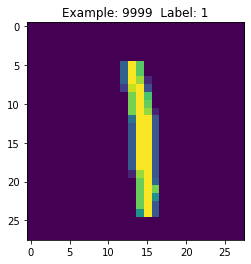

[None, None, None, None]


In [6]:
def ViewDigit(example_i):
    """take as input an index and returns the digit associated to that
    index and its true label"""
    label = y.loc[example_i]
    image = X.loc[example_i,:].values.reshape([28,28])
    plt.title(f'Example: {example_i}  Label: {label}')
    plt.imshow(image)
    plt.show()

print([ViewDigit(i) for i in [10, 25, 100, 9999]])

## Principal Component Analysis

The first dimensionality reduction method used in order to apply DBSCAN to the dataset is the Principal Component Analysis, in very few words, this method finds a unit vector $V \in \mathbb{R}^d$ such that the variance $$\sum_{i=1}^n \frac{(X^T_iV)^2}{n}$$

is maximised. 
Then the data $X_i \in \mathbb{R}^d$ is projected into $P \in \mathbb{R}$ by $P_i = X_i^T V$


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 784, random_state=23003)

In [8]:
X_PCA = pca.fit_transform(X)
X_PCA = pd.DataFrame(data = X_PCA)

In [9]:
print(f"Variance explained by all 784 principal components: {sum(pca.explained_variance_ratio_)}")

Variance explained by all 784 principal components: 0.9999999999999991


In [10]:
importanceOfPrincipalComponents = pd.DataFrame(data = pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

In [11]:
print(f"Variance explained by first 10 principal components: {importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values}")
print(f"Variance explained by first 20 principal components: {importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values}")
print(f"Variance explained by first 100 principal components: {importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values}")
print(f"Variance explained by first 150 principal components: {importanceOfPrincipalComponents.loc[:,0:149].sum(axis=1).values}")
print(f"Variance explained by first 200 principal components: {importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values}")
print(f"Variance explained by first 250 principal components: {importanceOfPrincipalComponents.loc[:,0:249].sum(axis=1).values}")

Variance explained by first 10 principal components: [0.49203501]
Variance explained by first 20 principal components: [0.64666796]
Variance explained by first 100 principal components: [0.91648195]
Variance explained by first 150 principal components: [0.94995755]
Variance explained by first 200 principal components: [0.96783898]
Variance explained by first 250 principal components: [0.9792475]


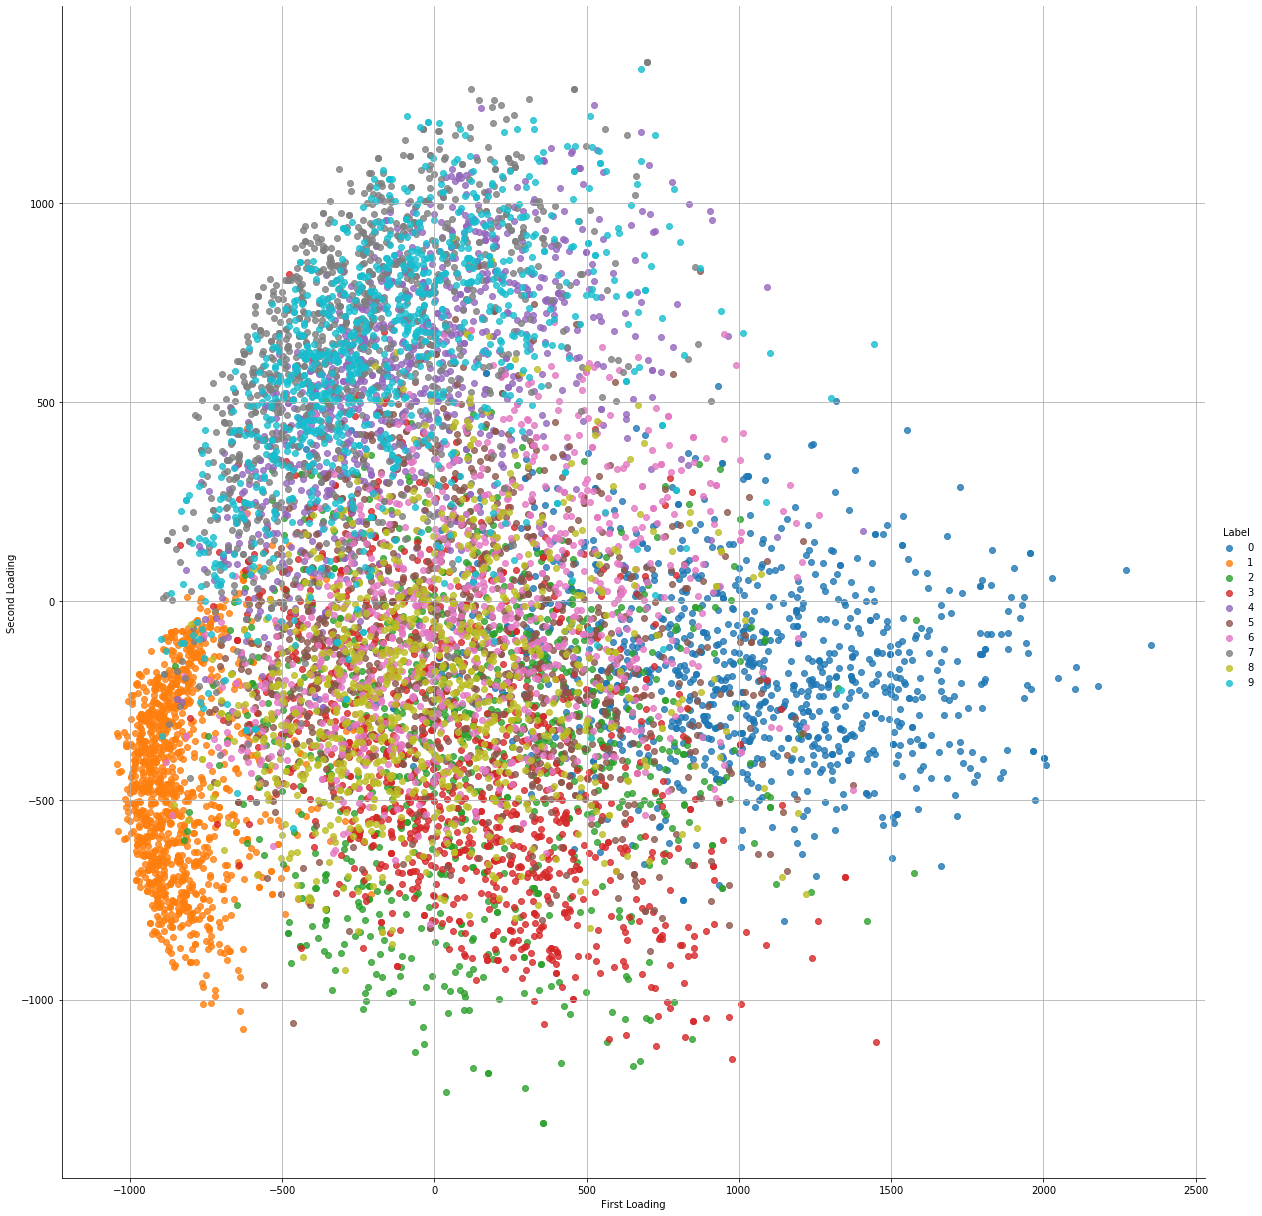

In [12]:
tempDF = pd.DataFrame(data=X_PCA.loc[:,0:1], index=X_PCA.index)
tempDF = pd.concat((tempDF,y), axis=1, join="inner")
tempDF.columns = ["First Loading", "Second Loading", "Label"]
sns.lmplot(x="First Loading", y="Second Loading", hue="Label", 
           data=tempDF, fit_reg=False, height=17)
plt.grid()

## Singular Value Decomposition

Singular Value Decomposition (SVD) is a tool that allows for the explicit analysis of the Hadamard’s condition and a good method in data analysis for dimensionality reduction.
Matrix Algebra tells us that any matrix $X \in \mathbb{R}^{k\times n}$ can be rewritten in the form
$$X = UDV^T$$

The right hand side of the above equation is called Singular Value Decomposition (SVD) of a matrix X.
$U \in \mathbb{R}^{k\times k}$, $V \in \mathbb{R}^{n\times n}$ are orthogonal matrices. 
$D \in \mathbb{R}^{k\times n}$ is a diagonal matrix where each entry is a singular value of X.

In this way, we reduce the rank of the original matrix data of features to a smaller rank such that the original matrix can be recreated using a linear combination of some of the vectors in the smaller rank matrix. The smaller rank matrix captures the most important elements of the original feature space.

This is very similar to PCA. In PCA the eigen-decomposition of the covariance matrix is performed for dimensionality reduction. In SVD we use singular value decomposition on the data matrix. 
In the following, a Truncated SVD is performed, i.e. we consider a lower rank stable matrix by discarding the smallest eigenvalues from $D$.

In [13]:
from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, 
                   n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X)
X_train_svd = pd.DataFrame(data=X_train_svd)


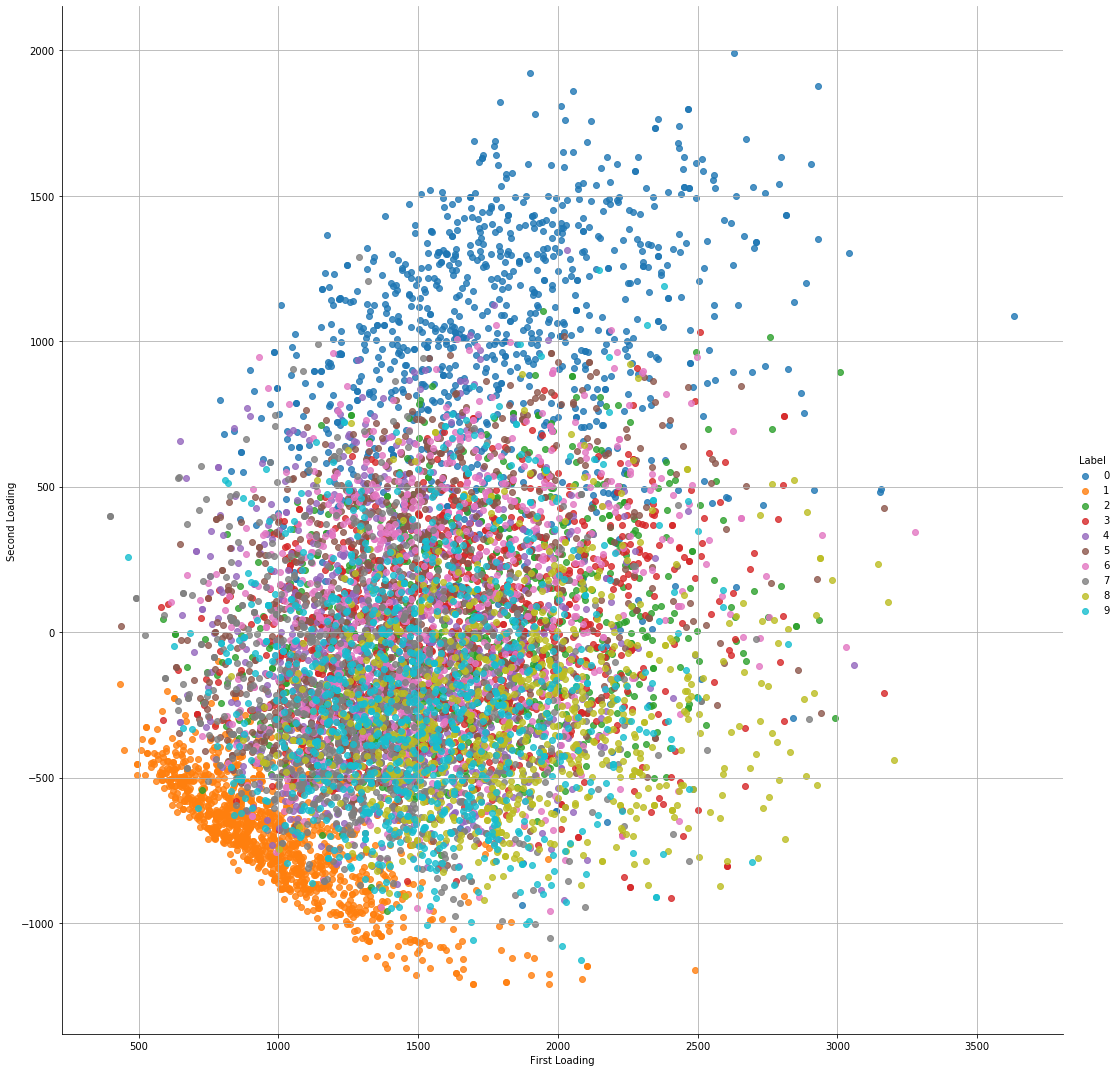

In [14]:
tempDF = pd.DataFrame(data=X_train_svd.loc[:,0:1], index=X_train_svd.index)
tempDF = pd.concat((tempDF,y), axis=1, join="inner")
tempDF.columns = ["First Loading", "Second Loading", "Label"]
sns.lmplot(x="First Loading", y="Second Loading", hue="Label", 
           data=tempDF, fit_reg=False, height=15)
plt.grid()

## t-Distributed Stochastic Neighbor Embedding

The last proposed method is Stochastic Neighbor Embedding (in particular, its more robust variant t-SNE)
The core idea is to match neighborhoods in the projection space with those in the original data space
Neighborhood. A probability distribution is estimated by assigning high probability to those samples that are similar in the original space and a lower probability otherwise. The algorithm tries to build an analogue probaiblity distribution for the dimensional reduced space, by minimizing the Kullback-Leibler divergence of the two probability distributions. Points are projected in the low-dimensional space by expoiting those results. In particular, it computes the following measures.


Low-dimensional space:
$$q_{ij} = \frac{- \left\lVert z_i - z_j \right\rVert^2}{\sum_{k\neq j} e^{-\left\lVert z_i - z_k\right\rVert^2}}$$

Original space: 
$$p_{ij} = \frac{- \left\lVert x_i - x_j \right\rVert^2}{\sum_{k\neq j} e^{-\left\lVert x_i - x_k\right\rVert^2}}$$

The loss measures how dissimilar the two neighborhoods are, averaged over all pairs

$$l(z) = KL(p,q) = \sum_{i,j} p_{ij}\log\frac{p_{ij}}{q_{ij}}$$

The Kullback-Leibler divergence is zero if and only if $p = q$.
In this way, it attempts to capture the local structure as well as possible.

Even better version, t-SNE, uses t-distributions in the embedding space to further discard global structure, often resulting in rather pretty visualizations (and exaggerated clustering)
Notice that this algo has a low convergence rate, so we require to estimate only two components and furthermore that it fitted on the dataset already reduced by the PCA, in particular we use the first 100 loadings, guaranteeing 92% of the original dataset variability.


In [15]:
from sklearn.manifold import TSNE

In [16]:
# this takes approx 2 minute
n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, 
            perplexity=perplexity, early_exaggeration=early_exaggeration, 
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_PCA.loc[:,:99])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE)

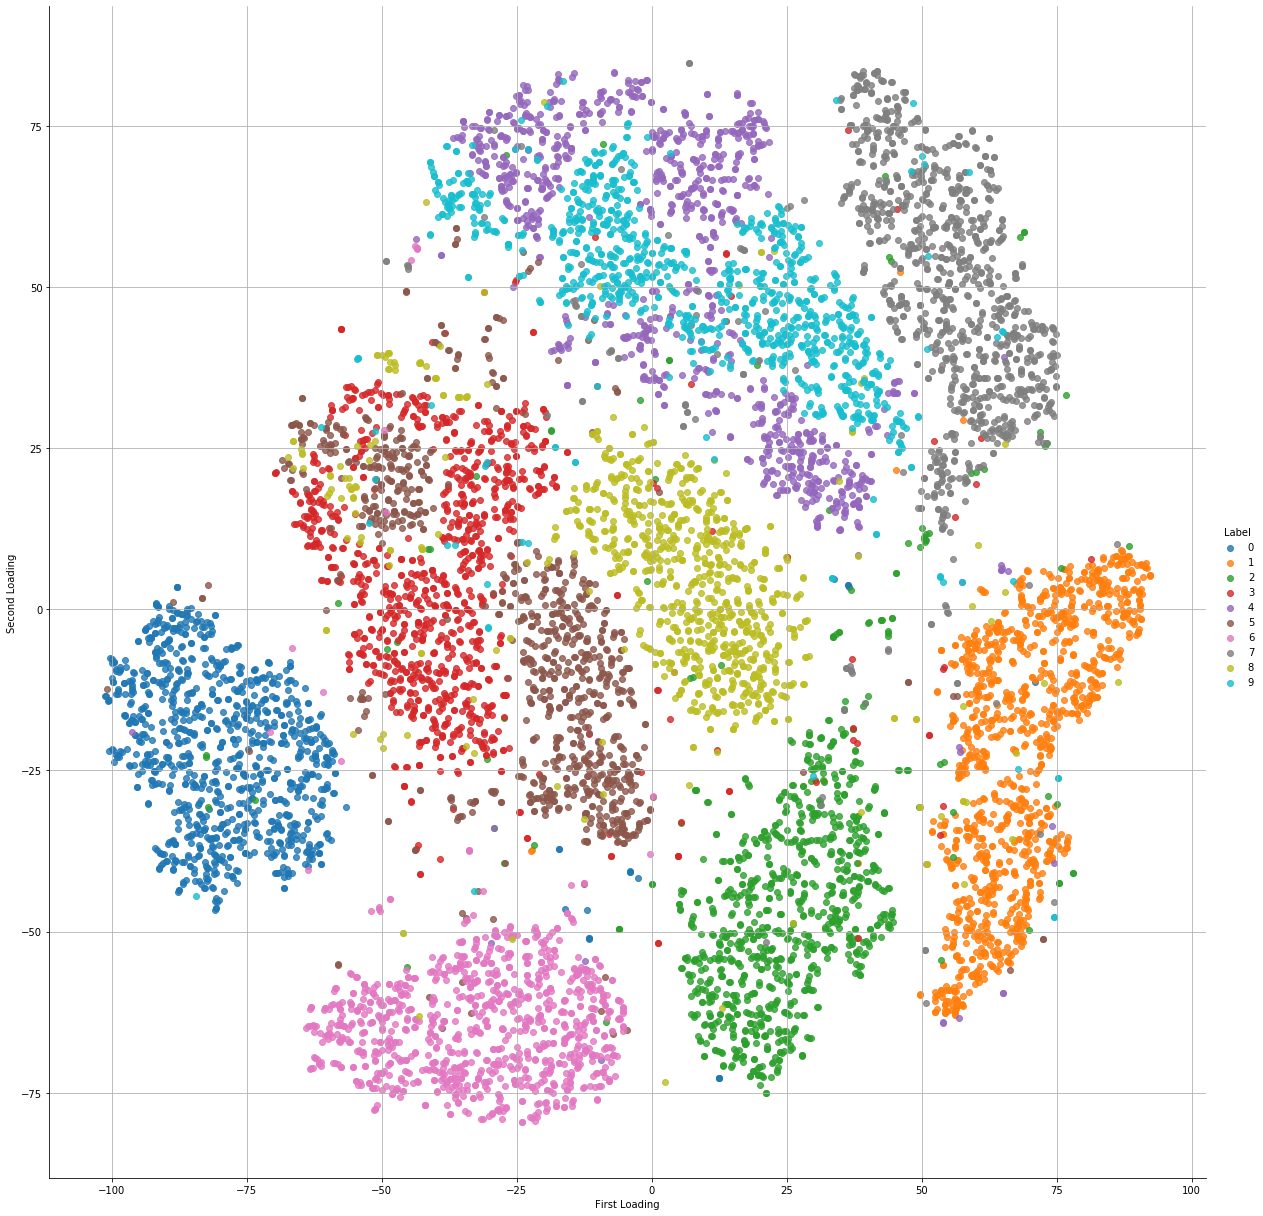

In [17]:
tempDF = pd.DataFrame(data=X_train_tSNE.loc[:,0:1], index=X_PCA.index)
tempDF = pd.concat((tempDF,y), axis=1, join="inner")
tempDF.columns = ["First Loading", "Second Loading", "Label"]

sns.lmplot(x="First Loading", y="Second Loading", hue="Label", 
           data=tempDF, fit_reg=False, height=17)
plt.grid()

## 3. Metrics for clustering algorithm and DBSCAN application

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric.
There are three kind of ways to evaluate a clustering algorithms performance:

**Unsupervised**: Measures the goodness of a clustering structure without respect to external information. Unsupervised measures of cluster validity are often further divided into two classes: measures of cluster cohesion (compactness, tightness), which determine how closely related the objects in a cluster are, and measures of cluster separation (isolation), which determine how distinct or well-separated a cluster is from other clusters. Unsupervised measures are often called internal indices because they use only information present in the data set.


**Supervised**: Measures the extent to which the clustering structure discovered by a clustering algorithm matches some external structure. An example of a supervised index is entropy, which measures how well cluster labels match externally supplied class labels. Supervised measures are often called external indices because they use information not present in the data set.


**Relative**: Compares different clusterings or clusters. A relative cluster evaluation measure is a supervised or unsupervised evaluation measure that is used for the purpose of comparison. Thus, relative measures are not actually a separate type of cluster evaluation measure, but are instead a specific use of such measures.

Since we have available the true label of each array, we will consider the supervised metrics.

In particular, we want to consider the following similiarity measures.
Those metrics are based on normalized conditional entropy measures of the clustering labeling to evaluate given the knowledge of a Ground Truth class labels of the same samples. Both scores have positive values between 0.0 and 1.0, larger values being desirable.

1. **Homogeneity**: A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way. [Reference](https://www.aclweb.org/anthology/D07-1043.pdf)


2. **Completeness** A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way. [Reference](https://www.aclweb.org/anthology/D07-1043.pdf)

3. **V-measures** The V-measure is the harmonic mean between Homogeneity and Completeness. [Reference](https://www.aclweb.org/anthology/D07-1043.pdf)

But also:
1. **Rand index adjusted for chance.** The Rand Index computes a similarity measure between two clustersby considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

$$ARI = \frac{(RI - \mathbb{E}[RI])}{(max(RI) - \mathbb{E}[RI])}$$

With $$RI = \frac{a+b}{C_2^{n_{samples}}}$$


Wich $C$ ground truth class assignment and $K$ the clustering.
Where $a$ is the number of pairs of elements that are, for example, in the same set in $C$ and in the same set in $K$, while $b$ is the number of pairs of elements that are in different sets in $C$ and in different sets in $K$.


    
The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation). [Reference](https://link.springer.com/article/10.1007%2FBF01908075)

2. **Adjusted Mutual Information** Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings $U$ and $V$, the AMI is given as:

 $$\text{AMI}(U, V) = \frac{\text{MI}(U, V) - \mathbb{E}[(\text{MI}(U, V))]}{avg(H(U), H(V)) - \mathbb{E}[\text{MI}(U, V)]}$$

Where $H(U)$ and $H(V)$ is the entropy of two clusters $U$ and $V$, i.e. the amount of uncertainty for a partition set.
While the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" obtained about one random variable through observing the other random variable:

$$MI(U,V) = \sum_{i=1}^{|U|}\sum_{i=1}^{|V|}P(i,j)\log\Big(\frac{P(i,j)}{P(i)P(j)}\Big)$$


This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.
. [Reference](http://jmlr.csail.mit.edu/papers/volume11/vinh10a/vinh10a.pdf)

3. **Overall Accuracy**


We would also want to apply another measure that we will call accuracy, since it somehow remembers the computation of accuracy in the supervised learning field, it is given by the following function and is based on a simple idea. 


First of all, we count the number of observations in each cluster and join this amount with the labels of MNIST.
Now, for each cluster, we count the number of observations for each distinct label within a cluster. For example, if a given cluster has three thousand observations, two thousand may represent the number two, five hundred may represent the number one, and etc.


Once we calculate these, we will store the count for the most frequently occurring number for each cluster. In the example above, we would store a count of two thousand for this cluster.
Finally, we will judge the success of each clustering run based on how tightly grouped the observations are within each cluster. For example, in the example above, the cluster has two thousand observations that have the same label out of a total of three thousand observations in the cluster.
This cluster is not great since we ideally want to group similar observations together in the same cluster and exclude dissimilar ones.
We define the overall accuracy of the clustering as the sum of the counts of the most frequently occuring observations across all the clusters divided by the total number of observations in the training set.

In [18]:
def MyAccuracyAndGeneralResults(clusterDF, labelsDF):
    """This function takes as input an clustering method fitted and returns the count
    of most frequent label in each cluster, an overall accuracy index and how many clusters
    has been founded from the algorithm"""
    
    countByCluster = pd.DataFrame(data=clusterDF['cluster'].value_counts())
    
    countByCluster.reset_index(inplace=True,drop=False)
    
    countByCluster.columns = ['cluster','clusterCount']
    
    preds = pd.concat([labelsDF,clusterDF], axis=1)
    
    preds.columns = ['trueLabel','cluster']
    
    countByLabel = pd.DataFrame(data=preds.groupby('trueLabel').count())
    
    countMostFreq = pd.DataFrame(data=preds.groupby('cluster').agg(lambda x: x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
                                
    countMostFreq.columns = ['cluster','countMostFrequent']
    
    accuracyDF = countMostFreq.merge(countByCluster, 
                        left_on="cluster",right_on="cluster")
    
    overallAccuracy = accuracyDF.countMostFrequent.sum() / accuracyDF.clusterCount.sum()
    
    accuracyByLabel = accuracyDF.countMostFrequent/ accuracyDF.clusterCount
    
    return countByCluster, countByLabel, countMostFreq, accuracyDF, overallAccuracy, accuracyByLabel

In [19]:
def GenerateMeasures(n_clusters_, n_noise_, labels_true, labels):
    print(f'Estimated number of clusters: {n_clusters_}')
    print(f'Estimated number of noise points: {n_noise_}')
    print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.4f}" )
    print(f"Completeness: {metrics.completeness_score(labels_true, labels):.4f}")
    print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.4f}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.4f}")
    print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.4f}")

### Apply DBSCAN on X_PCA

In [20]:
eps = 3 # try different values, but with no improvement...
min_samples = 5

db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_PCA.loc[:,0:199]) # try different values of loadings

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)
GenerateMeasures(n_clusters_, n_noise_, y, db.labels_)

Estimated number of clusters: 0
Estimated number of noise points: 10000
Homogeneity: 0.0000
Completeness: 1.0000
V-measure: 0.0000
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: 0.0000


In [21]:
db = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_PCA.loc[:,0:199])
XdbscanClustered = pd.DataFrame(data=db, index = X_PCA.index, columns=['cluster'])
countByCluster, countByLabel, countMostFreq, accuracyDF, overallAccuracy, accuracyByLabel = MyAccuracyAndGeneralResults(XdbscanClustered, y)
print(f"The overall Accuracy with dbscan on X_PCA is: {overallAccuracy}")
print(f"The clusters found are:")
countByCluster

The overall Accuracy with dbscan on X_PCA is: 0.114
The clusters found are:


,cluster,clusterCount
0,-1,10000


### Apply DBSCAN on X_svd

In [22]:
# this takes aprox 2 minutes
eps = 50
min_samples = 50
# try different values

db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_train_svd)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

GenerateMeasures(n_clusters_, n_noise_, y, db.labels_)

Estimated number of clusters: 0
Estimated number of noise points: 10000
Homogeneity: 0.0000
Completeness: 1.0000
V-measure: 0.0000
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: 0.0000


In [23]:
db = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_train_svd)
XdbscanClustered = pd.DataFrame(data=db, index = X_PCA.index, columns=['cluster'])
countByCluster, countByLabel, countMostFreq, accuracyDF, overallAccuracy, accuracyByLabel = MyAccuracyAndGeneralResults(XdbscanClustered, y)
print(f"The overall Accuracy with dbscan on X_svd is: {overallAccuracy}")
print(f"The clusters found are:")
countByCluster

The overall Accuracy with dbscan on X_svd is: 0.114
The clusters found are:


,cluster,clusterCount
0,-1,10000


### Apply DBSCAN on X_tSNE

In [24]:
eps = 3
min_samples = 15

db = DBSCAN(eps=eps, min_samples=min_samples, metric = 'l2')
# distance tested: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
db = db.fit(X_train_tSNE)

n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

GenerateMeasures(n_clusters_, n_noise_, y, db.labels_)

Estimated number of clusters: 15
Estimated number of noise points: 766
Homogeneity: 0.7891
Completeness: 0.7341
V-measure: 0.7606
Adjusted Rand Index: 0.6665
Adjusted Mutual Information: 0.7334


Here it is interesting to notice how $\varepsilon =3$ and $MinPoints = 15$ seems to be the optimal parameters

In [25]:
X_train_tSNE_dbscanClustered = db.fit_predict(X_train_tSNE)
X_train_tSNE_dbscanClustered = pd.DataFrame(data=X_train_tSNE_dbscanClustered, 
                 columns=['cluster'])

countByCluster_dbscan_tSNE, countByLabel_dbscan_tSNE, countMostFreq_dbscan_tSNE, accuracyDF_dbscan_tSNE, overallAccuracy_dbscan_tSNE, accuracyByLabel_dbscan_tSNE =  MyAccuracyAndGeneralResults(X_train_tSNE_dbscanClustered, y)

print(f"The overall Accuracy with dbscan on X_tSNE is: {overallAccuracy_dbscan_tSNE}")
print(f"The clusters found are:")
countByCluster_dbscan_tSNE

The overall Accuracy with dbscan on X_tSNE is: 0.8251
The clusters found are:


,cluster,clusterCount
0,2,1554
1,1,1181
2,5,976
3,7,935
4,0,882
5,4,805
6,-1,766
7,9,712
8,10,681
9,12,591


## 4. Comparison with other Clustering Algorithms

With the previous analsysis we get the higher score described in the following table. Those are reached by using the DBSCAN algorithm on the data Matrix that has been dimensionally reduced previously using a PCA and then a t-SNE algorithm. 

| Measure | Score |
|:---------------------------:|:------:|
| Homogeneity | 0.7891 |
| Completeness | 0.7341 |
| V-measure | 0.7606 |
| Adjusted Rand Index | 0.6665 |
| Adjusted Mutual Information | 0.7334 |
| Overall Accuracy | 0.8251 |

In this phase we try to test other unsupervised clustering algorithms and to compare the resulting performance with the ones obtained above. In this way we can conclude how the DBSCAN performs into the MNIST dataset with respect to other unsupervised approaches.

In [26]:
def GenerateMeasures_2(labels_true, labels):
    print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.4f}" )
    print(f"Completeness: {metrics.completeness_score(labels_true, labels):.4f}")
    print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.4f}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.4f}")
    print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.4f}")

### K-Means Clustering

**Algorithm**
1. Randomly assign a number, from 1 to $K$, to each of the observations. These serve as initial cluster assignments for the observations.
2. Iterate until the cluster assignments stop changing:

    *(a)* For each of the $K$ clusters, compute the cluster centroid. The k-th cluster centroid is the vector of the $p$ feature means for the observations in the k-th cluster.
    
    *(b)* Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).
    
    
[Reference](http://faculty.marshall.usc.edu/gareth-james/ISL/) - Chapter 10

In [27]:
from sklearn.cluster import KMeans

In [28]:
n_init = 10
max_iter = 300
random_state = 20023
tol = 0.0001
n_jobs = 2

overallAccuracy_kMeansDF =  pd.DataFrame(data=[], index=range(2,21),columns=['overallAccuracy'])

for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, 
                max_iter=max_iter, tol=tol, random_state=random_state, 
                n_jobs=n_jobs)

    kmeans.fit(X_PCA.loc[:,:199])
    X_train_kmeansClustered = kmeans.predict(X_PCA.loc[:,0:199])
    X_train_kmeansClustered =  pd.DataFrame(data=X_train_kmeansClustered, index=X_PCA.index, 
                     columns=['cluster'])

    countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans, accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans = MyAccuracyAndGeneralResults(X_train_kmeansClustered, y)

    overallAccuracy_kMeansDF.loc[n_clusters] = overallAccuracy_kMeans

In [29]:
overallAccuracy_kMeansDF

,overallAccuracy
2,0.2089
3,0.302
4,0.3815
5,0.4562
6,0.4764
7,0.5158
8,0.587
9,0.582
10,0.5763
11,0.6207


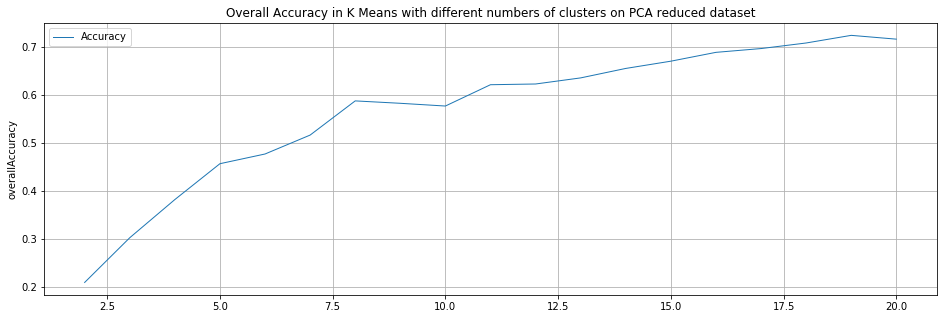

In [30]:
plt.figure(figsize=(16,5))
plt.title("Overall Accuracy in K Means with different numbers of clusters on PCA reduced dataset")
sns.lineplot(x = overallAccuracy_kMeansDF.index, y = overallAccuracy_kMeansDF.overallAccuracy, 
            estimator=None, lw=1, label="Accuracy")
plt.grid()

In [31]:
kmeans = KMeans(n_clusters=20, n_init=n_init, 
                max_iter=max_iter, tol=tol, random_state=random_state, 
                n_jobs=n_jobs)
kmeans.fit(X_PCA.loc[:,:199])
X_train_kmeansClustered = kmeans.predict(X_PCA.loc[:,0:199])
X_train_kmeansClustered =  pd.DataFrame(data=X_train_kmeansClustered, index=X_PCA.index, 
                 columns=['cluster'])

In [32]:
labels = kmeans.labels_
labels_true = y
GenerateMeasures_2(labels_true, labels)

Homogeneity: 0.6285
Completeness: 0.4875
V-measure: 0.5491
Adjusted Rand Index: 0.3491
Adjusted Mutual Information: 0.4860


In [33]:
overallAccuracy_kMeansDF =  pd.DataFrame(data=[],index=range(2,21),columns=['overallAccuracy'])

for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, 
                max_iter=max_iter, tol=tol, random_state=random_state, 
                n_jobs=n_jobs)

    kmeans.fit(X_train_tSNE)
    X_train_kmeansClustered = kmeans.predict(X_train_tSNE)
    X_train_kmeansClustered =  pd.DataFrame(data=X_train_kmeansClustered, index=X_PCA.index, 
                     columns=['cluster'])

    countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans, accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans = MyAccuracyAndGeneralResults(X_train_kmeansClustered, y)

    overallAccuracy_kMeansDF.loc[n_clusters] = overallAccuracy_kMeans

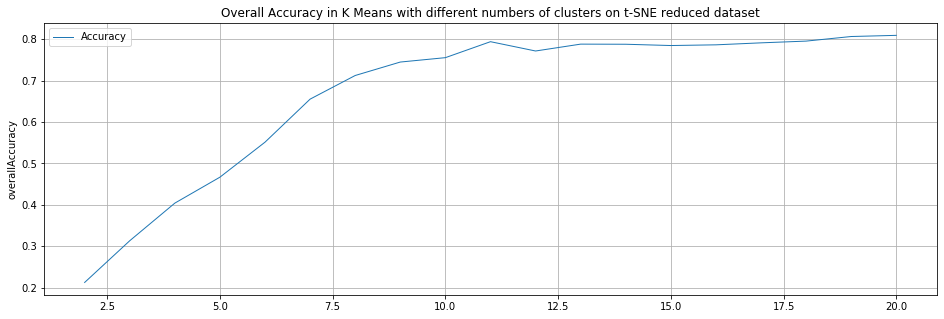

In [34]:
plt.figure(figsize=(16,5))
plt.title("Overall Accuracy in K Means with different numbers of clusters on t-SNE reduced dataset")
sns.lineplot(x = overallAccuracy_kMeansDF.index, y = overallAccuracy_kMeansDF.overallAccuracy, 
            estimator=None, lw=1, label="Accuracy")
plt.grid()

In [35]:
kmeans = KMeans(n_clusters=11, n_init=n_init, 
            max_iter=max_iter, tol=tol, random_state=random_state, 
            n_jobs=n_jobs)

kmeans.fit(X_train_tSNE)
X_train_kmeansClustered = kmeans.predict(X_train_tSNE)

In [36]:
labels = kmeans.labels_
labels_true = y
GenerateMeasures_2(labels_true, labels)

Homogeneity: 0.7467
Completeness: 0.7203
V-measure: 0.7333
Adjusted Rand Index: 0.6413
Adjusted Mutual Information: 0.7197


### Gaussian Mixtures

Given a Gaussian mixture model, the goal is to maximize the likelihood function with respect to the parameters (comprising the means and covariances of the components and the mixing coefficients).

**Algorithm**

1. Initialize the means $\mu_k$, covariances $\Sigma_k$ and mixing coefficients $\pi_k$, and evaluate the initial value of the log likelihood.
2. **E step** Evaluate the responsibilities using the current parameter values $$\gamma(z_{nk})=\frac{\pi_k N(x_n|\mu_k,\Sigma_k)}{\sum_{j=1}^K \pi_j N(x_n|\mu_j,\Sigma_j)}$$

3. **M step**  Re-estimate the parameters using the current responsibilities
$$\mu_k^{\text{new}} = \frac{1}{N_k}\sum_{n=1}^N\gamma(z_{nk})x_n$$
$$\Sigma_k^{\text{new}} = \frac{1}{N_k}\sum_{n=1}^N\gamma(z_{nk})(x_n-\mu_k^{\text{new}})(x_n -\mu_k^{\text{new}})^T$$
$$\pi_k^{\text{new}} = \frac{N_k}{N}$$

    where $N_k = \sum_{n=1}^N \gamma(z_{nk})$ 

4. Evaluate the log likelihood
    $$\log p(X|\mu, \Sigma, \pi) = \sum_{n=1}^N \log \Bigg[\sum_{k=1}^K \pi_k N(x_n|\mu_k, \Sigma_k) \Bigg]$$
    
    and check for convergence of either the parameters or the log likelihood. If the convergence criterion is not satisfied return to step 2.

[Reference](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf) -  Chapter 9

In [37]:
from sklearn import mixture

In [38]:
clf = mixture.GaussianMixture(n_components=10, covariance_type='full')
X_train_GM_Clustered = clf.fit(X_PCA.loc[:,:1])
X_train_GM_Clustered = clf.predict(X_PCA.loc[:,:1])
X_train_GM_Clustered =  pd.DataFrame(data=X_train_GM_Clustered, index=X_train_tSNE.index, 
                     columns=['cluster'])

countByCluster_GM, countByLabel_GM, countMostFreq_GM, accuracyDF_GM, overallAccuracy_GM, accuracyByLabel_GM = MyAccuracyAndGeneralResults(X_train_GM_Clustered, y)

In [39]:
overallAccuracy_GM

0.3949

In [40]:
GenerateMeasures_2(labels_true, X_train_GM_Clustered.cluster)

Homogeneity: 0.3471
Completeness: 0.3541
V-measure: 0.3505
Adjusted Rand Index: 0.2141
Adjusted Mutual Information: 0.3459


In [41]:
countByCluster_GM

,cluster,clusterCount
0,9,1622
1,3,1215
2,8,1149
3,0,1122
4,1,1057
5,2,970
6,4,945
7,5,834
8,6,551
9,7,535


In [42]:
clf = mixture.GaussianMixture(n_components=10, covariance_type='full')
X_train_GM_Clustered = clf.fit(X_train_tSNE)
X_train_GM_Clustered = clf.predict(X_train_tSNE)
X_train_GM_Clustered =  pd.DataFrame(data=X_train_GM_Clustered, index=X_train_tSNE.index, 
                     columns=['cluster'])

countByCluster_GM, countByLabel_GM, countMostFreq_GM, accuracyDF_GM, overallAccuracy_GM, accuracyByLabel_GM = MyAccuracyAndGeneralResults(X_train_GM_Clustered, y)

In [43]:
overallAccuracy_GM

0.7593

In [44]:
GenerateMeasures_2(labels_true, X_train_GM_Clustered.cluster)

Homogeneity: 0.7253
Completeness: 0.7379
V-measure: 0.7316
Adjusted Rand Index: 0.6197
Adjusted Mutual Information: 0.7248


In [45]:
countByCluster_GM

,cluster,clusterCount
0,9,1564
1,1,1374
2,2,1164
3,4,988
4,5,981
5,0,943
6,6,903
7,8,868
8,7,664
9,3,551


## 5. Conclusions

From the performed analysis, we can conclude that after an efficient pre processing phase, consisting of PCA and t-SNE applied as dimensionality reduction methods, DBSCAN algorithm achieves good performances. As a matter of fact, even if  Kmeans and Gaussian Mixtures models reach similar performances, their metrics are not as high as the DBSCAN ones.
We report the following table to summarize the previous results, concluding that altough generally good, they remain far away from the supervised learning framework. However, when we consider only unsupervised learning methods, DBSCAN seems to perform better.
Altough this aspect, it is also important to consider that the Gaussian Mixtures model achieves simal performance, but when forced to find exaclty ten groups, i.e. the real number of cluster that we expect to find. So, from an interpretability point of view, this algorithm might be preferred. 

| Measure | DBSCAN  | Kmeans | Gaussian Mixtures |
|:---------------------------:|:-------:|:------:|:-----------------:|
| Homogeneity | 0.7891 | 0.7467 | 0.7253 |
| Completeness | 0.7341 | 0.7203 | 0.7379 |
| V-measure | 0.7606 | 0.7333 | 0.7316 |
| Adjusted Rand Index | 0.6665 | 0.6413 | 0.6197 |
| Adjusted Mutual Information | 0.7334 | 0.7197 | 0.7248 |
| Overall Accuracy | 0.8251 | 0.7235 | 0.7593 |

## Cluster results representation

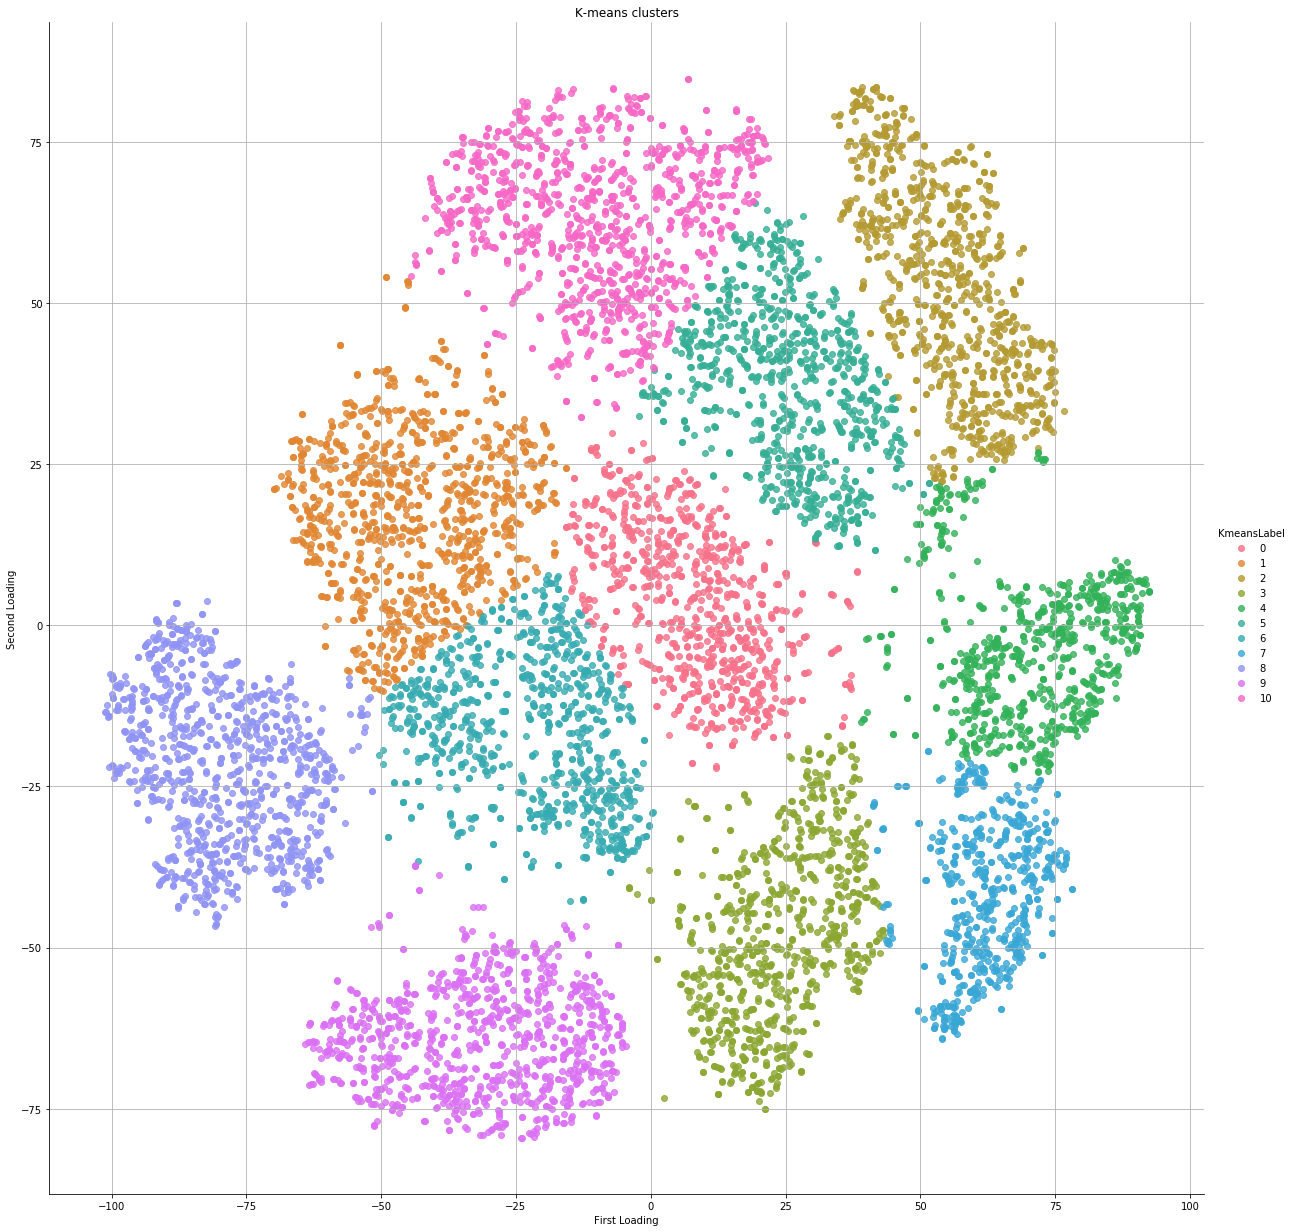

In [46]:
tempDF["KmeansLabel"] = X_train_kmeansClustered
sns.lmplot(x="First Loading", y="Second Loading", hue="KmeansLabel", 
           data=tempDF, fit_reg=False, height=17)
plt.title("K-means clusters")
plt.grid()

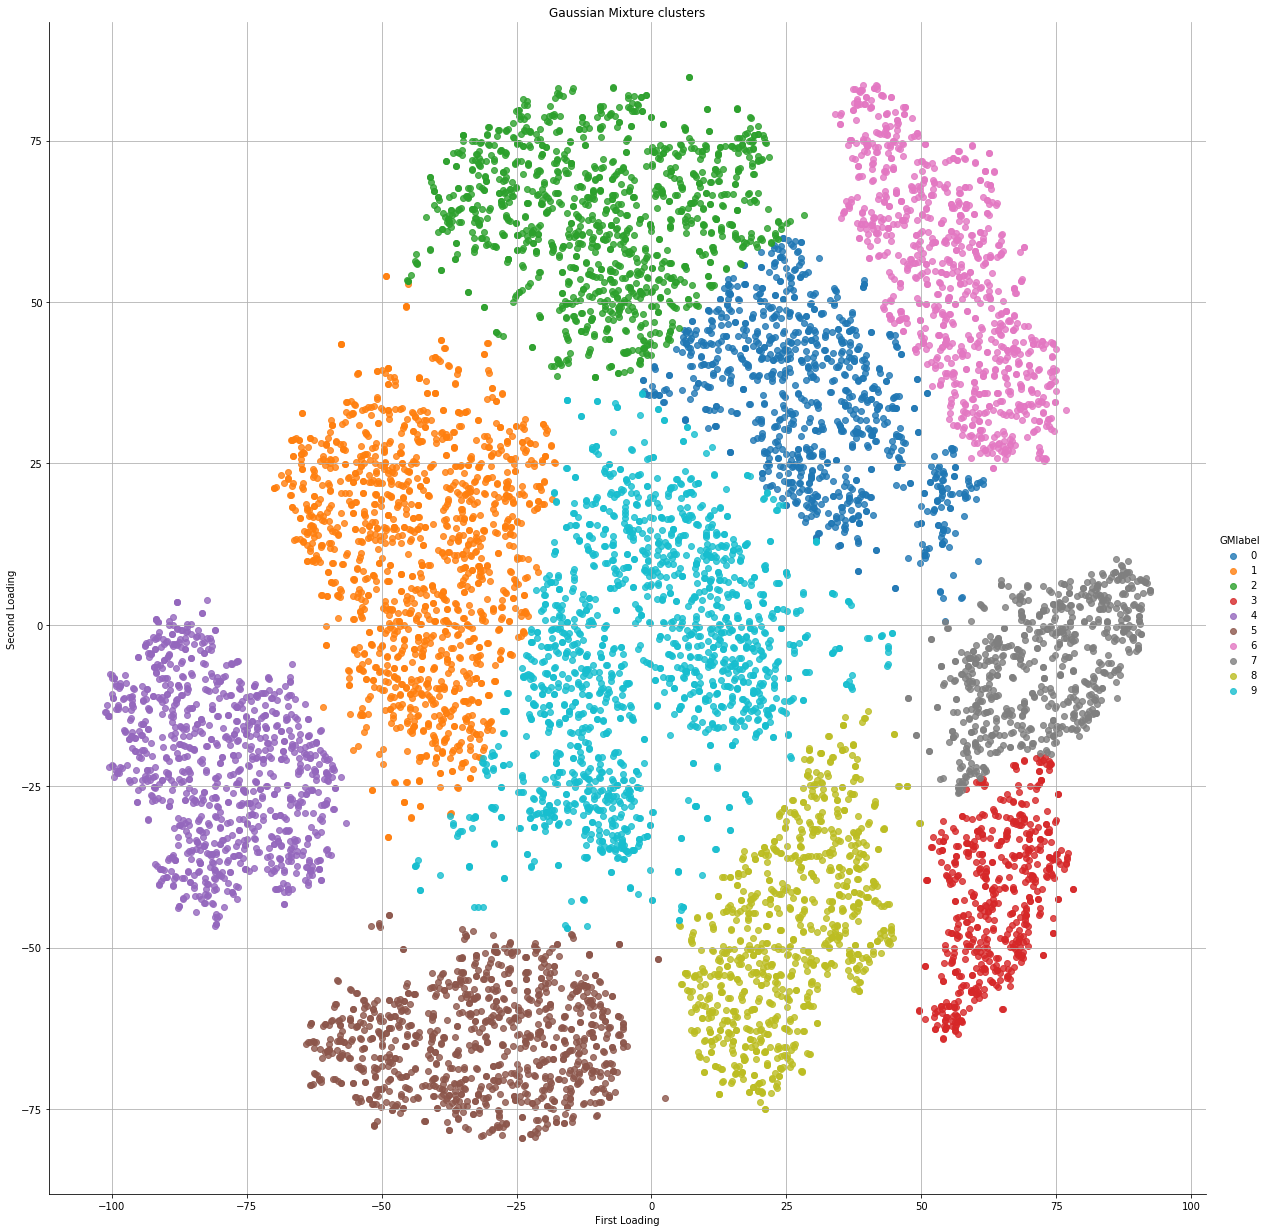

In [47]:
tempDF["GMlabel"] = X_train_GM_Clustered.cluster
sns.lmplot(x="First Loading", y="Second Loading", hue="GMlabel", 
           data=tempDF, fit_reg=False, height=17)
plt.title("Gaussian Mixture clusters")
plt.grid()

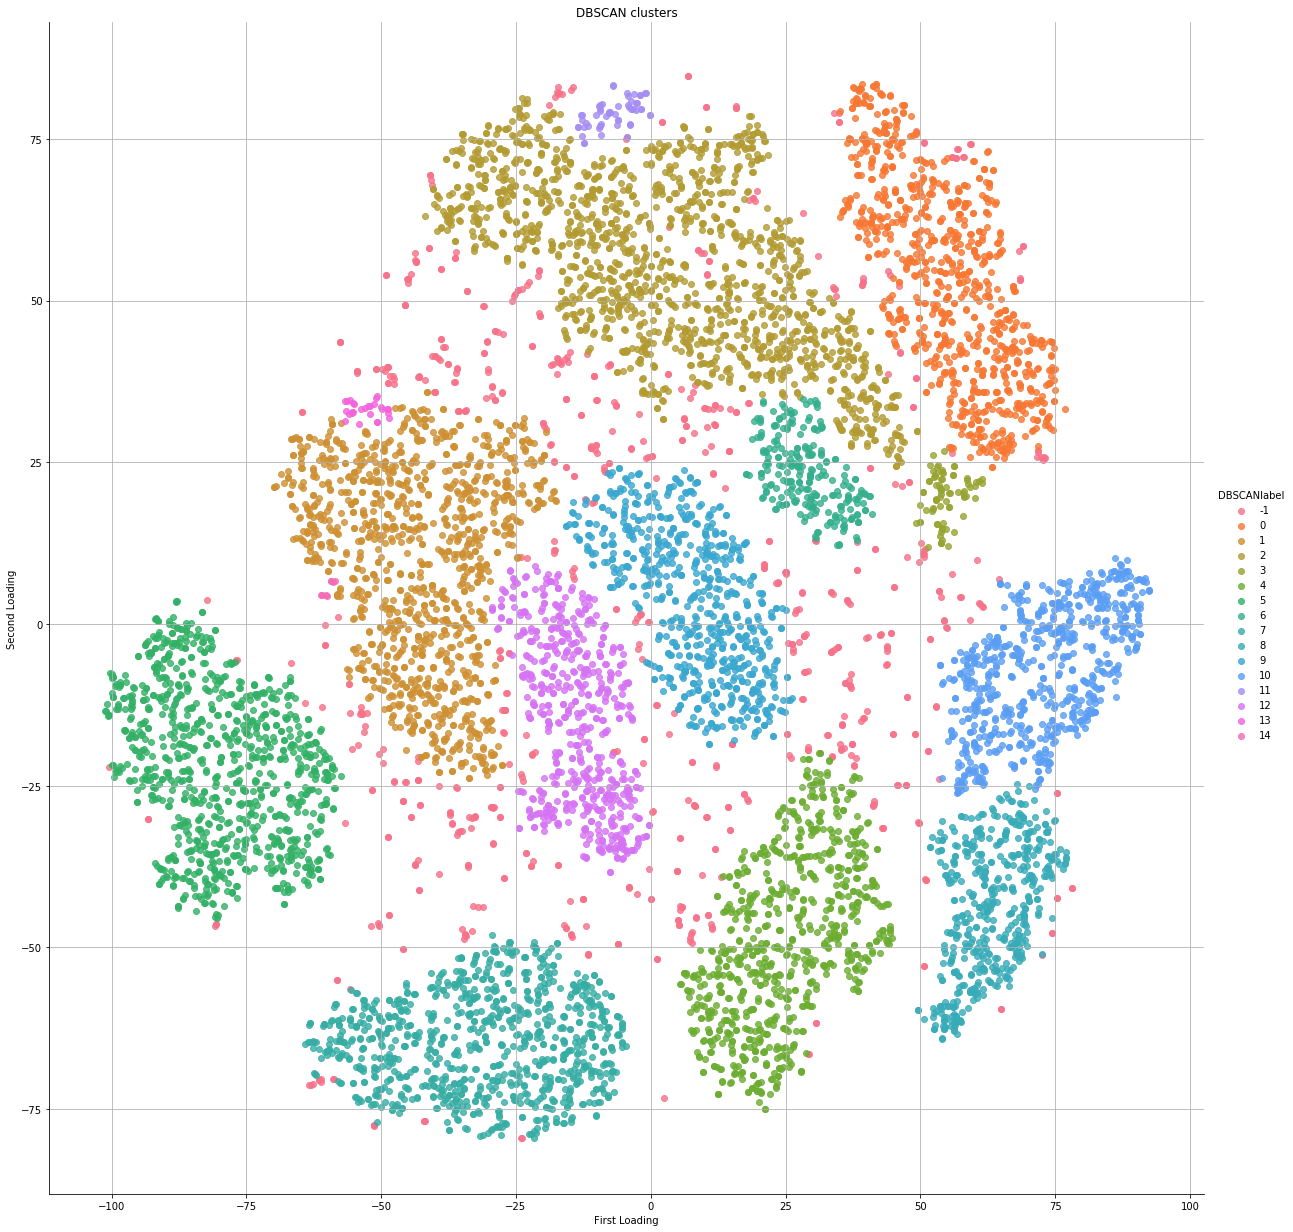

In [48]:
tempDF["DBSCANlabel"] = X_train_tSNE_dbscanClustered.cluster
sns.lmplot(x="First Loading", y="Second Loading", hue="DBSCANlabel", 
           data=tempDF, fit_reg=False, height=17)
plt.title("DBSCAN clusters")
plt.grid()